# **Análisis de las partidas**
___

### Instalar e importar las librerias para el analisis de las partidas

In [ ]:
! pip install pandas
! pip install matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

### Importamos el archivo con los datos y crear el DataFrame.

In [2]:
archivo = "datos_de_jugadas.csv"
carpeta = os.path.join(os.path.realpath('..'), '..', 'registros', archivo)

In [3]:
try:
    partidas = pd.read_csv(carpeta)
except FileNotFoundError:
    print(f"No se encontro el archivo {archivo}")

### Conocer el DataFrame.

* Ver las columnas, cuantos registros tiene cada columna y el tipo de dato.

In [4]:
partidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        282 non-null    float64
 1   id               282 non-null    object 
 2   evento           282 non-null    object 
 3   nombre_jugador   282 non-null    object 
 4   edad_jugador     282 non-null    int64  
 5   genero_jugador   282 non-null    object 
 6   estado           222 non-null    object 
 7   texto_ingresado  175 non-null    object 
 8   respuesta        212 non-null    object 
 9   nivel            282 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 22.2+ KB


* Conocer la estructura del dataset.

In [5]:
partidas.head(15)

,timestamp,id,evento,nombre_jugador,edad_jugador,genero_jugador,estado,texto_ingresado,respuesta,nivel
0,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,inicio_partida,NEO,80,Masculino,NaN,NaN,NaN,Facil
1,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,ok,Christina Perri,Christina Perri,Facil
2,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Bazzi,Calvin Harris,Facil
3,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Selena Gomez,Rae Sremmurd,Facil
4,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Lauv,Edward Maya,Facil
5,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,pasar,NEO,80,Masculino,NaN,NaN,Natalie La Rose,Facil
6,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,XXXTENTACION,Adele,Facil
7,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Migos,Future,Facil
8,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,pasar,NEO,80,Masculino,NaN,NaN,Taylor Swift,Facil
9,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Daya,Iyaz,Facil


* Para conocer las medidas de tendencia central y de dispercion de las columnas cuantitativas del DataFrame.
* En este caso solo es útil la columna de "edad del jugador".

In [6]:
partidas.describe()

,timestamp,edad_jugador
count,2.820000e+02,282.000000
mean,1.655724e+09,67.258865
std,1.910763e+05,17.512792
min,1.655432e+09,28.000000
25%,1.655526e+09,55.000000
50%,1.655776e+09,68.000000
75%,1.655909e+09,80.000000
max,1.656011e+09,90.000000


# Estadísticas y gráficos
___

###  Gráfico que muestra el porcentaje de partidas por estado (error, ok, cancelado, finalizada).

* Sumar la cantidad de veces que aparece cada registro repetido en el dataset en la columna de "estado".

In [7]:
estado = partidas['estado'].value_counts()

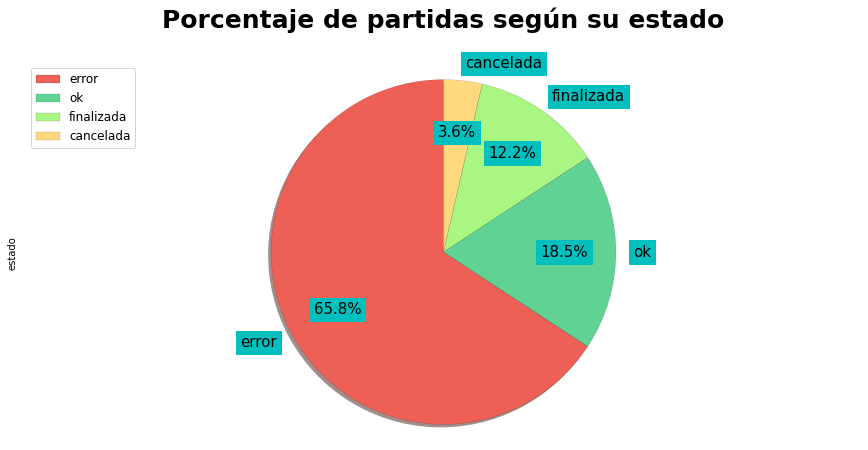

In [8]:
colores = ["#EE6055", "#60D394", "#AAF683", "#FFD97D", "#FF9B85"]

estado.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(15, 7),
            pctdistance=0.7, radius=1.2, shadow=True, colors=colores,
            textprops={'fontsize': 15, 'color': 'black', 'backgroundcolor': 'c'},
            wedgeprops={'linewidth': 0.1, 'edgecolor': 'black'})

plt.title("Porcentaje de partidas según su estado", pad=35, loc="center",
          fontdict={'fontsize': 25, 'fontweight': 'bold', 'backgroundcolor': 'white'})

plt.legend(loc=2, fontsize=12)
plt.axis('equal')
plt.show()

* Cálculo con los registros de partidas "finalizada" o "cancelada".

In [9]:
estado_fin = estado[['finalizada', 'cancelada']]

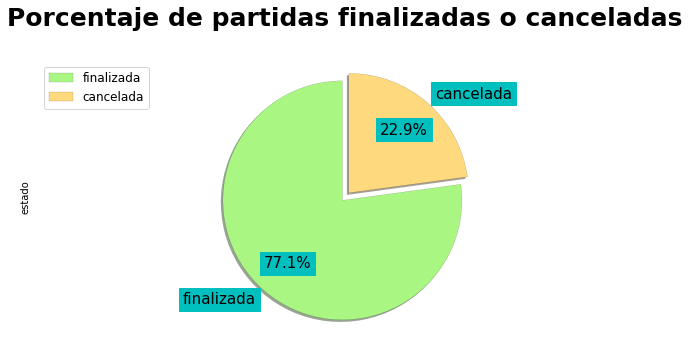

In [10]:
colores = ["#AAF683", "#FFD97D"]
explode = 0,0.1

estado_fin.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(11, 5),
                pctdistance=0.7, radius=1.2, shadow=True, colors=colores, explode=explode,
                textprops={'fontsize': 15, 'color': 'black', 'backgroundcolor': 'c'},
                wedgeprops={'linewidth': 0.1, 'edgecolor': 'black'})

plt.title("Porcentaje de partidas finalizadas o canceladas", pad=35, loc="center",
          fontdict={'fontsize': 25, 'fontweight': 'bold', 'backgroundcolor': 'white'})

plt.legend(loc=2, fontsize=12)
plt.axis('equal')
plt.show()

* Cálculo con los registros con rondas por "error" o "ok".

In [11]:
estado_respuestas = estado[['error', 'ok']]

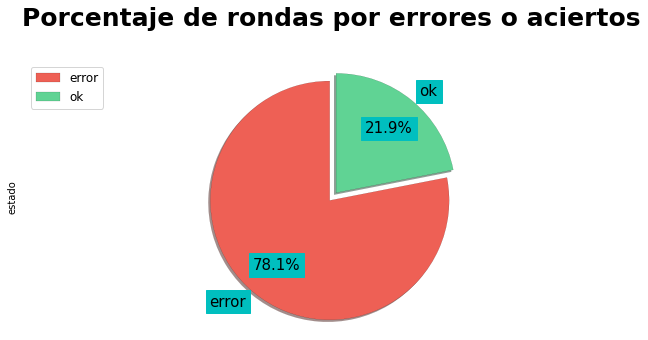

In [12]:
colores = ["#EE6055", "#60D394"]
explode = 0,0.1

estado_respuestas.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(11, 5),
                       pctdistance=0.7, radius=1.2, shadow=True, colors=colores, explode=explode,
                       textprops={'fontsize': 15, 'color': 'black', 'backgroundcolor': 'c'},
                       wedgeprops={'linewidth': 0.1, 'edgecolor': 'black'})

plt.title("Porcentaje de rondas por errores o aciertos", pad=35, loc="center",
          fontdict={'fontsize': 25, 'fontweight': 'bold', 'backgroundcolor': 'white'})

plt.legend(loc=2, fontsize=12)
plt.axis('equal')
plt.show()

### Duración total de la partida (desde que el usuarie empieza a jugar hasta que presiona salir o pasan las N rondas definidas para el nivel de dificultad actual).

In [17]:
partidas.head(12)

,timestamp,id,evento,nombre_jugador,edad_jugador,genero_jugador,estado,texto_ingresado,respuesta,nivel
0,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,inicio_partida,NEO,80,Masculino,NaN,NaN,NaN,Facil
1,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,ok,Christina Perri,Christina Perri,Facil
2,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Bazzi,Calvin Harris,Facil
3,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Selena Gomez,Rae Sremmurd,Facil
4,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Lauv,Edward Maya,Facil
5,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,pasar,NEO,80,Masculino,NaN,NaN,Natalie La Rose,Facil
6,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,XXXTENTACION,Adele,Facil
7,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Migos,Future,Facil
8,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,pasar,NEO,80,Masculino,NaN,NaN,Taylor Swift,Facil
9,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Daya,Iyaz,Facil


* Separar en dos DataFrame los inicios de partida y los fin de partida.
1. Seleccionar las columnas que necesitamos.
2. Filtrar en dos DataFrames los inicios y fin de partida segun el "evento".
3. Cambiar el nombre de la columna timestamp por el nombre del evento de cada DataFrame.
4. Eliminar la columna evento que ya no se necesita.

In [18]:
columnas = partidas[['id', 'timestamp', 'evento']]

inicio = columnas[columnas['evento'].isin(['inicio_partida'])]
fin = columnas[columnas['evento'].isin(['fin'])]

inicio = inicio.rename(columns={'timestamp': 'tiempo_inicio'})
fin = fin.rename(columns={'timestamp': 'tiempo_fin'})

inicio = inicio.drop(columns=['evento'])
fin = fin.drop(columns=['evento'])

In [19]:
inicio.head(3)

,id,tiempo_inicio
0,db74505f-3fe3-476c-866d-872fea96a3b2,1.655432e+09
12,b8d68931-5986-4704-99ac-1f606dac48ae,1.655432e+09
24,3c3f6710-3cef-459e-9013-0fbaf8af05f5,1.655432e+09


In [20]:
fin.head(3)

,id,tiempo_fin
11,db74505f-3fe3-476c-866d-872fea96a3b2,1.655432e+09
23,b8d68931-5986-4704-99ac-1f606dac48ae,1.655432e+09
29,3c3f6710-3cef-459e-9013-0fbaf8af05f5,1.655432e+09


* Merge de las columnas de tiempo.
* En el caso del "id" va a coincidir, y en el caso de los tiempos, se va a corresponder cada uno en la linea del "id".

In [21]:
tiempos = pd.merge(inicio, fin[['id', 'tiempo_fin']], how='left')
tiempos.head(5)

,id,tiempo_inicio,tiempo_fin
0,db74505f-3fe3-476c-866d-872fea96a3b2,1.655432e+09,1.655432e+09
1,b8d68931-5986-4704-99ac-1f606dac48ae,1.655432e+09,1.655432e+09
2,3c3f6710-3cef-459e-9013-0fbaf8af05f5,1.655432e+09,1.655432e+09
3,e1edc516-b996-42e9-97c3-a56a4080eaab,1.655495e+09,1.655495e+09
4,40d2a50d-2f04-44cc-9665-44a0f720d9a7,1.655525e+09,1.655525e+09


* Restar el tiempo_fin por el tiempo_inicio y obtener el tiempo de cada partida en segundos.
* Y agregarlo al DataFrame creando una nueva columna y ese es el tiempo que le corresponde a cada partida según su "id".

In [22]:
tiempos['duracion'] = tiempos['tiempo_fin'] - tiempos['tiempo_inicio']
tiempos.head(5)

,id,tiempo_inicio,tiempo_fin,duracion
0,db74505f-3fe3-476c-866d-872fea96a3b2,1.655432e+09,1.655432e+09,40.810952
1,b8d68931-5986-4704-99ac-1f606dac48ae,1.655432e+09,1.655432e+09,32.292118
2,3c3f6710-3cef-459e-9013-0fbaf8af05f5,1.655432e+09,1.655432e+09,13.458615
3,e1edc516-b996-42e9-97c3-a56a4080eaab,1.655495e+09,1.655495e+09,2.230888
4,40d2a50d-2f04-44cc-9665-44a0f720d9a7,1.655525e+09,1.655525e+09,64.529064


### Gráfico que muestra el porcentaje de partidas finalizadas según nivel.

* Sumar la cantidad de veces que aparece cada registro repetido en el dataset en la columna de "nivel".

In [23]:
estado_finalizadas = partidas[partidas['estado'] == 'finalizada']
nivel = estado_finalizadas.groupby('nivel')
nivel = nivel.size()

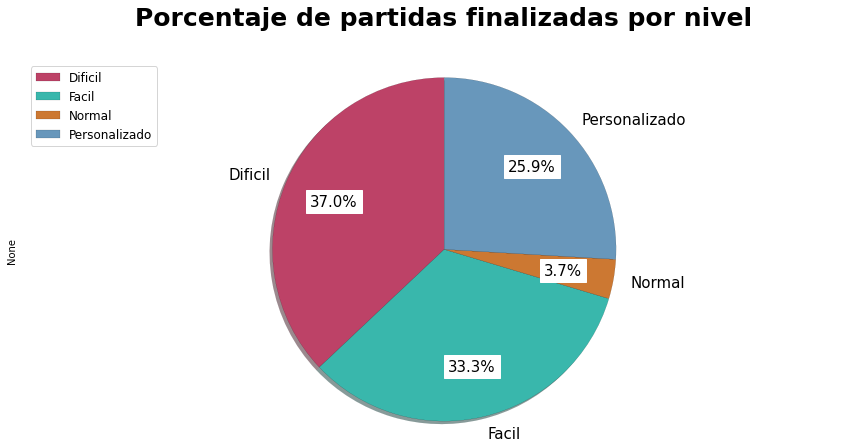

In [24]:
colores = ["#BD4267", "#39B7AC", "#CC7832", "#6897BB", "#AAF683", "#FFD97D"]

nivel.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(15, 7),
           pctdistance=0.7, radius=1.2, shadow=True, colors=colores,
           textprops={'fontsize': 15, 'color': 'black', 'backgroundcolor': 'white'},
           wedgeprops={'linewidth': 0.1, 'edgecolor': 'black'})

plt.title("Porcentaje de partidas finalizadas por nivel", pad=35, loc="center",
          fontdict={'fontsize': 25, 'fontweight': 'bold', 'backgroundcolor': 'white'})

plt.legend(loc=2, fontsize=12)
plt.axis('equal')
plt.show()

### Promedio de tiempo de partidas finalizadas por nivel.

In [25]:
partidas.head(12)

,timestamp,id,evento,nombre_jugador,edad_jugador,genero_jugador,estado,texto_ingresado,respuesta,nivel
0,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,inicio_partida,NEO,80,Masculino,NaN,NaN,NaN,Facil
1,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,ok,Christina Perri,Christina Perri,Facil
2,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Bazzi,Calvin Harris,Facil
3,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Selena Gomez,Rae Sremmurd,Facil
4,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Lauv,Edward Maya,Facil
5,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,pasar,NEO,80,Masculino,NaN,NaN,Natalie La Rose,Facil
6,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,XXXTENTACION,Adele,Facil
7,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Migos,Future,Facil
8,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,pasar,NEO,80,Masculino,NaN,NaN,Taylor Swift,Facil
9,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Daya,Iyaz,Facil


* Separar en dos DataFrame los "inicios de partida" y los "fin de partida", pero ahora con el estado y nivel para calcular.
1. Seleccionar las columnas que necesitamos.
2. Filtrar en dos DataFrames los inicios y fin de partida segun el "evento".
3. Cambiar el nombre de la columna timestamp por el nombre del evento de cada DataFrame.

In [26]:
columnas = partidas[['id', 'timestamp', 'evento', 'estado', 'nivel']]

inicio = columnas[columnas['evento'].isin(['inicio_partida'])]
fin = columnas[columnas['evento'].isin(['fin'])]

inicio = inicio.rename(columns={'timestamp': 'tiempo_inicio'})
fin = fin.rename(columns={'timestamp': 'tiempo_fin'})

In [27]:
inicio.head(3)

,id,tiempo_inicio,evento,estado,nivel
0,db74505f-3fe3-476c-866d-872fea96a3b2,1.655432e+09,inicio_partida,NaN,Facil
12,b8d68931-5986-4704-99ac-1f606dac48ae,1.655432e+09,inicio_partida,NaN,Facil
24,3c3f6710-3cef-459e-9013-0fbaf8af05f5,1.655432e+09,inicio_partida,NaN,Facil


In [28]:
fin.head(3)

,id,tiempo_fin,evento,estado,nivel
11,db74505f-3fe3-476c-866d-872fea96a3b2,1.655432e+09,fin,finalizada,Facil
23,b8d68931-5986-4704-99ac-1f606dac48ae,1.655432e+09,fin,finalizada,Facil
29,3c3f6710-3cef-459e-9013-0fbaf8af05f5,1.655432e+09,fin,cancelada,Facil


* Merge de las columnas.
>* En el caso de las columnas de "id" y "nivel" coinciden en las lineas.
>* De ambos DataFrames nos interesa unir el valor del tiempo de inicio y fin, así que se unen en la misma linea que coincida el "id" y "nivel".
>* En el caso de la columna de "estado" solo hacer merge del "estado" del DataFrame de fin para saber si el estado de la partida fue finalizado o cancelado, en el caso del DataFrame de inicio la columna "estado" no sirve para este caso.

1. Filtrar las lineas según si tiene el valor de "finalizada" que son las filas para calcular.
2. Restar el tiempo_fin por el tiempo_inicio y obtener el tiempo de cada partida en segundos.
3. Crear una nueva columna con la duración en el DataFrame.
4. Seleccionar las columnas de "nivel" y "duracion".

In [29]:
por_nivel = pd.merge(inicio[['id', 'tiempo_inicio', 'nivel']], fin[['id', 'tiempo_fin', 'nivel', 'estado']], how='left')

las_finalizadas = por_nivel[por_nivel['estado'].isin(['finalizada'])]

los_f = las_finalizadas.copy()
los_f['duracion'] = las_finalizadas['tiempo_fin'] - las_finalizadas['tiempo_inicio']

por_nivel = los_f[['nivel', 'duracion']]
los_f.head(5)

,id,tiempo_inicio,nivel,tiempo_fin,estado,duracion
0,db74505f-3fe3-476c-866d-872fea96a3b2,1.655432e+09,Facil,1.655432e+09,finalizada,40.810952
1,b8d68931-5986-4704-99ac-1f606dac48ae,1.655432e+09,Facil,1.655432e+09,finalizada,32.292118
4,40d2a50d-2f04-44cc-9665-44a0f720d9a7,1.655525e+09,Normal,1.655525e+09,finalizada,64.529064
5,8bb4f470-0e9b-4584-a181-df7cf94d801d,1.655525e+09,Dificil,1.655525e+09,finalizada,31.441335
6,0d173ffa-5cb1-4980-bb53-a21beb15b960,1.655525e+09,Facil,1.655525e+09,finalizada,122.371170


* El promedio y la tiempo total de la duración en segundos por nivel.

In [30]:
promedio = por_nivel.groupby('nivel').mean('duracion').rename(columns={'duracion': 'promedio'})
total_seg = por_nivel.groupby('nivel').sum('duracion').rename(columns={'duracion': 'total_seg'})
total_y_promedio = pd.concat([promedio, total_seg], axis=1)

total_y_promedio

,promedio,total_seg
nivel,,
Dificil,20.318120,203.181197
Facil,48.837175,439.534573
Normal,64.529064,64.529064
Personalizado,27.554431,192.881016


### Gráfico que muestra el porcentaje de partidas finalizadas según género.

1. Filtrar todas las columnas con estado "finalizada".
2. Agrupar por genero del jugador.

In [31]:
estado_finalizadas = partidas[partidas['estado'] == 'finalizada']
agrupar_genero = estado_finalizadas.groupby('genero_jugador')
agrupar_genero = agrupar_genero.size()

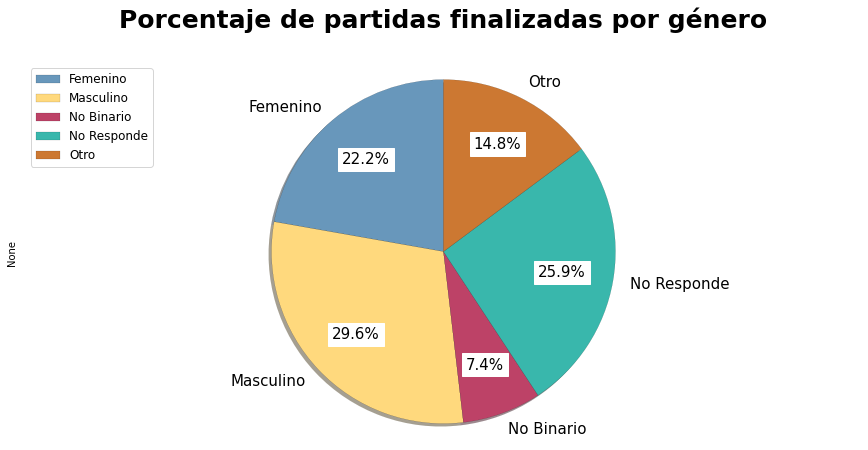

In [32]:
colores = ["#6897BB", "#FFD97D", "#BD4267", "#39B7AC", "#CC7832", "#AAF683",]

agrupar_genero.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(15, 7),
                    pctdistance=0.7, radius=1.2, shadow=True, colors=colores,
                    textprops={'fontsize': 15, 'color': 'black', 'backgroundcolor': 'white'},
                    wedgeprops={'linewidth': 0.1, 'edgecolor': 'black'})

plt.title("Porcentaje de partidas finalizadas por género", pad=35, loc="center",
          fontdict={'fontsize': 25, 'fontweight': 'bold', 'backgroundcolor': 'white'})

plt.legend(loc=2, fontsize=12)
plt.axis('equal')
plt.show()

### Top 10 de palabras que se encuentran primero de todas las partidas.

* Separar en dos el DataFrame para poder restar cada linea con la anterior y poder calcular el tiempo de cada ronda.
1. Al DataFrame inicio se le elimina la última linea.
2. Al DataFrame fin se le elimina la primera linea.

In [6]:
inicio = partidas.drop(len(partidas.index) -1).reset_index()
inicio.tail(3)

,index,timestamp,id,evento,nombre_jugador,edad_jugador,genero_jugador,estado,texto_ingresado,respuesta,nivel
278,278,1.656011e+09,ee2040c5-fd84-42d7-8806-54ce7073621b,pasar,kaggel,28,No Binario,NaN,NaN,Stromboli (Italy),Dificil
279,279,1.656011e+09,ee2040c5-fd84-42d7-8806-54ce7073621b,intento,kaggel,28,No Binario,error,Pacaya (Guatemala),Hekla (Iceland),Dificil
280,280,1.656011e+09,ee2040c5-fd84-42d7-8806-54ce7073621b,intento,kaggel,28,No Binario,error,Masaya (Nicaragua),Mayon (Philippines),Dificil


In [7]:
fin = partidas.drop(0).reset_index()
fin.head(3)

,index,timestamp,id,evento,nombre_jugador,edad_jugador,genero_jugador,estado,texto_ingresado,respuesta,nivel
0,1,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,ok,Christina Perri,Christina Perri,Facil
1,2,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Bazzi,Calvin Harris,Facil
2,3,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Selena Gomez,Rae Sremmurd,Facil


* Restar las lineas (una con su anterior), y agregar una nueva columna con la duracion de cada ronda.
> Tiene unas excepciónes porque a los inicios de partida se le resta el fin de partida y ese da como tiempo no valido de una ronda, sino que seria el tiempo que paso desde una partida a otra. Pero para este caso, tenemos que calcular los minimos, que son de pocos segundos.

In [15]:
palabras = partidas.copy()

palabras["duracion"] = fin["timestamp"] - inicio["timestamp"]
palabras.head(5)

,timestamp,id,evento,nombre_jugador,edad_jugador,genero_jugador,estado,texto_ingresado,respuesta,nivel,duracion
0,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,inicio_partida,NEO,80,Masculino,NaN,NaN,NaN,Facil,8.231454
1,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,ok,Christina Perri,Christina Perri,Facil,2.912129
2,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Bazzi,Calvin Harris,Facil,5.803136
3,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Selena Gomez,Rae Sremmurd,Facil,2.938909
4,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Lauv,Edward Maya,Facil,2.487448


* Calcular las respuestas correctas por menor duración y luego obtener las palabras que fueron acertadas.

### Porcentaje de palabras no encontradas en las partidas "timeout", es decir que finalizaron por falta de tiempo para completar.

* Me quedo con la cantidad de palabras, que no pudieron ser adivinadas, en el tiempo dado :

In [33]:
cant_timeout = len(partidas[partidas['evento'] == 'timeout'])

* Me quedo con la cantidad del resto de palabras, que no se quedaron sin tiempo para poder ser adivinadas o no :  

In [34]:
cant_no_timeout = len(partidas[partidas['evento'] != 'timeout'])

In [35]:
cant_total = pd.Series({'Sin Timeout': cant_no_timeout, 'Timeout': cant_timeout})

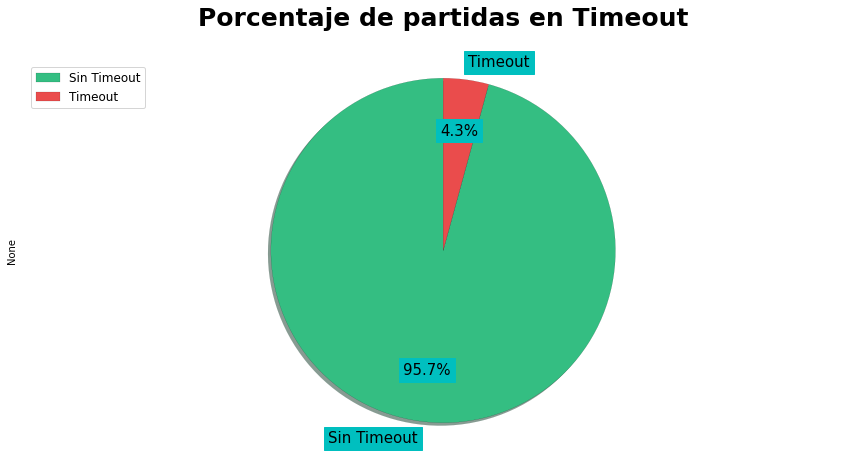

In [36]:
colores = ["#34BE82", "#EA4C4C"]

cant_total.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(15, 7),
            pctdistance=0.7, radius=1.2, shadow=True, colors=colores,
            textprops={'fontsize': 15, 'color': 'black', 'backgroundcolor': 'c'},
            wedgeprops={'linewidth': 0.1, 'edgecolor': 'black'})

plt.title("Porcentaje de partidas en Timeout", pad=35, loc="center",
          fontdict={'fontsize': 25, 'fontweight': 'bold', 'backgroundcolor': 'white'})

plt.legend(loc=2, fontsize=12)
plt.axis('equal')
plt.show()

* Top 10 palabras NO encontradas por Timeout: 

In [37]:
palabras_time_out = partidas[partidas['evento'] == 'timeout']['respuesta'].value_counts()

top_10 = pd.concat([palabras_time_out[0:10]], axis=1, keys=['Cantidad'])

top_10

,Cantidad
Dragonfly,1
PAW Patrol: Jet To The Rescue,1
Lords of Scam,1
Rachid Bouhenna,1
Kwame Poku,1
Transporter 2,1
Blue Crush,1
Saint Seiya: Legend of Crimson Youth,1
The Fixies: Top Secret,1
I Give My First Love to You,1
